# 5장 데이터 사전 처리

1. 누락 데이터 처리
- 머신러닝 등 데이터 분석의 정확도는 분석 데이터의 품질에 의해 좌우
- 데이터 품질을 높이기 위해서는 누락 데이터, 중복데이터 등 오류를 수정하고 분석 목적에 맞게 변형하는 과정이 필요
- 이전부터 가지고 있거나 수집한 데이터로 인공지능은 때려 맞추는 것이다

누락 데이터 확인

In [7]:
import seaborn as sns

df = sns.load_dataset('titanic')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
 # nan값들이 있음

In [11]:
# index가 891개가 있는데 deck가 nan이 아닌 값은 891-203 개임, 보기가 불편함
# NaN을 보기 위해서 deck 카테고리형 변수이고 카테고리가 abc일때 a는 몇개 b는 몇개 c는 몇갠지 알아보는 것임

In [15]:
# 카테고리별로 중복된게 몇개인지 알아보는 함수
# deck 열의 NaN 개수 계산하기
# 난 값이 아니라 난 값이 아닌것만 세고 있다. 밑에 있음
nan_deck = df['deck'].value_counts()
nan_deck

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [19]:
nan_deck = df['deck'].value_counts(dropna=False)
nan_deck # 난값과 카테고리별 개수도 확인할 수 있었다

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [23]:
# isnull() - 누락된 데이터에 true 반환 유효한 데이터가 존재하면 False # NaN에 True가 나온다
# notnull() - 유효한 값에는 False 누락에서는 False
# True 는 1이고 이걸 sum 해버리면 null값이 몇개인지 알 수 있다

In [25]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [27]:
# isnull() - 누락된 데이터에 true 반환 유효한 데이터가 존재하면 False # NaN에 True가 나온다
df.isnull() # True값이 있는걸 볼 수 있다

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df.notnull()
# 누락데이터는 False, 누락되지 않은 데이터에는 True 값 반환

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [35]:
df.isnull().sum() # 누락 데이터를 볼 수 있다 
# 팁승지와 탑승도시가 있는 건 null값이 동일하다 S C S, 도시이름 이 있으니까 하나는 지워도 될듯

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

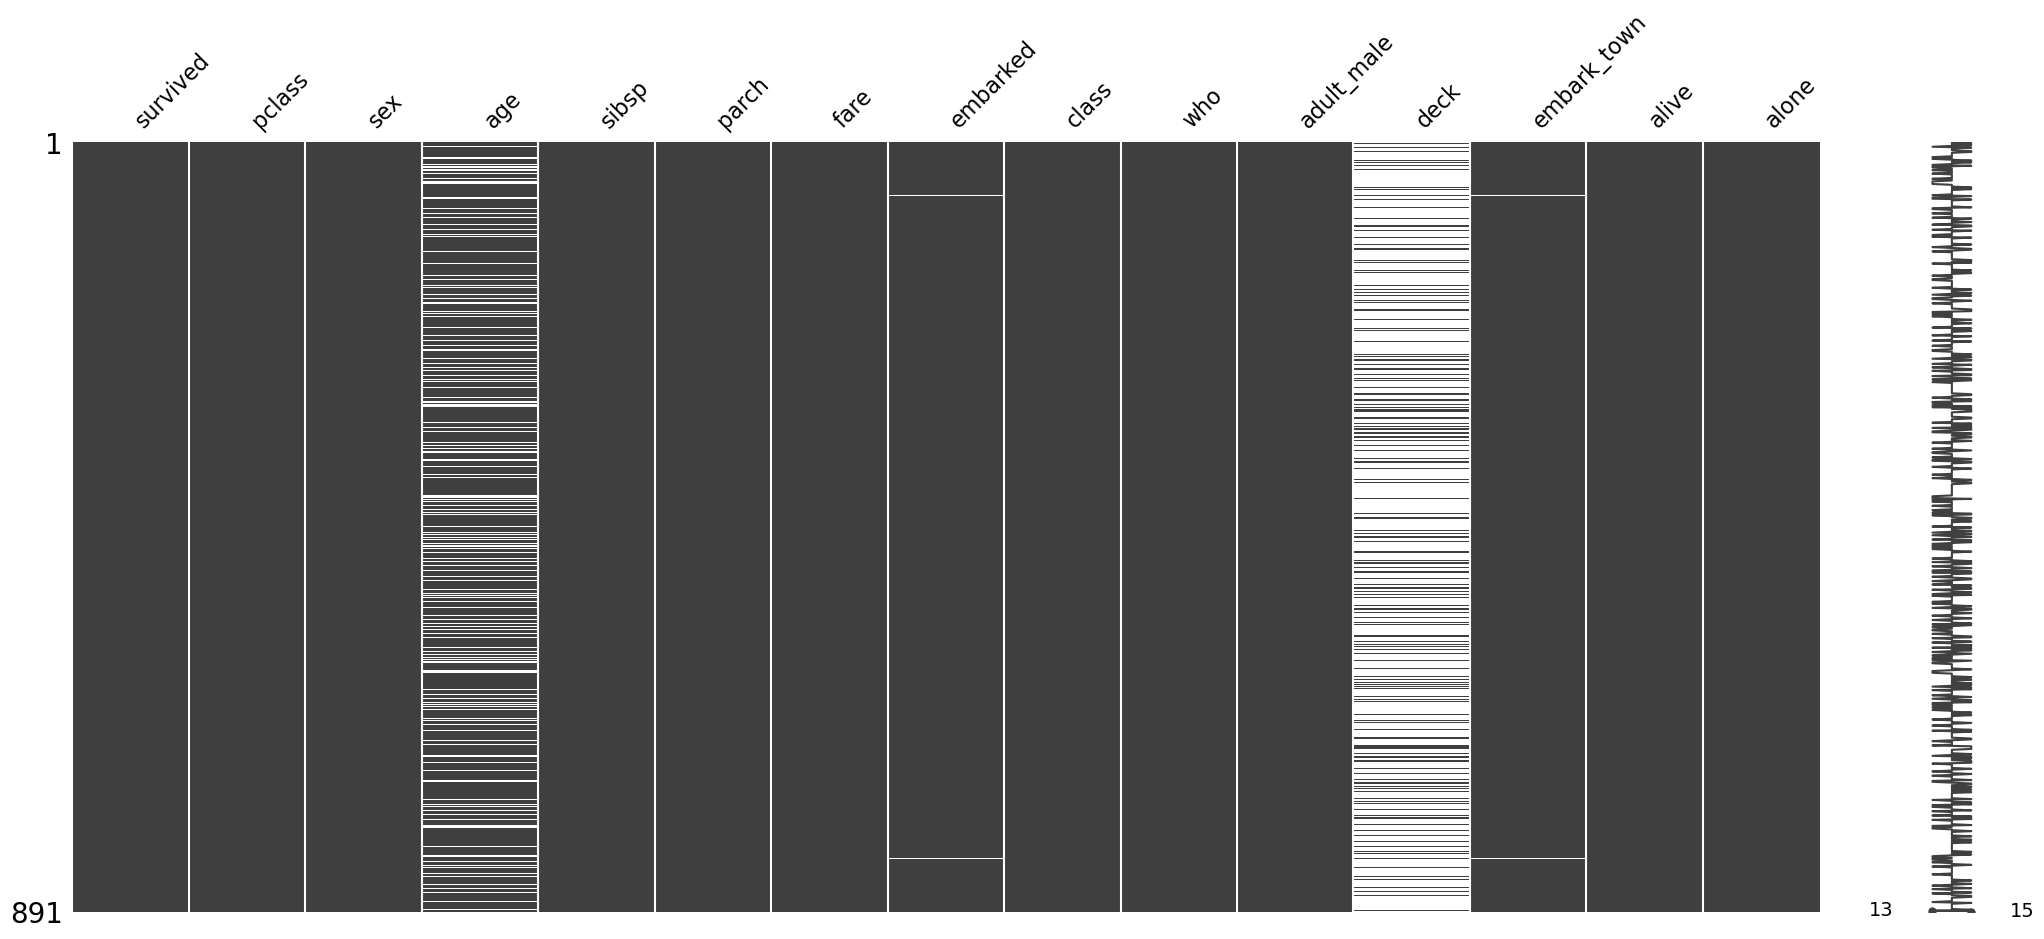

In [84]:
# missingno 라이브러리 활용
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

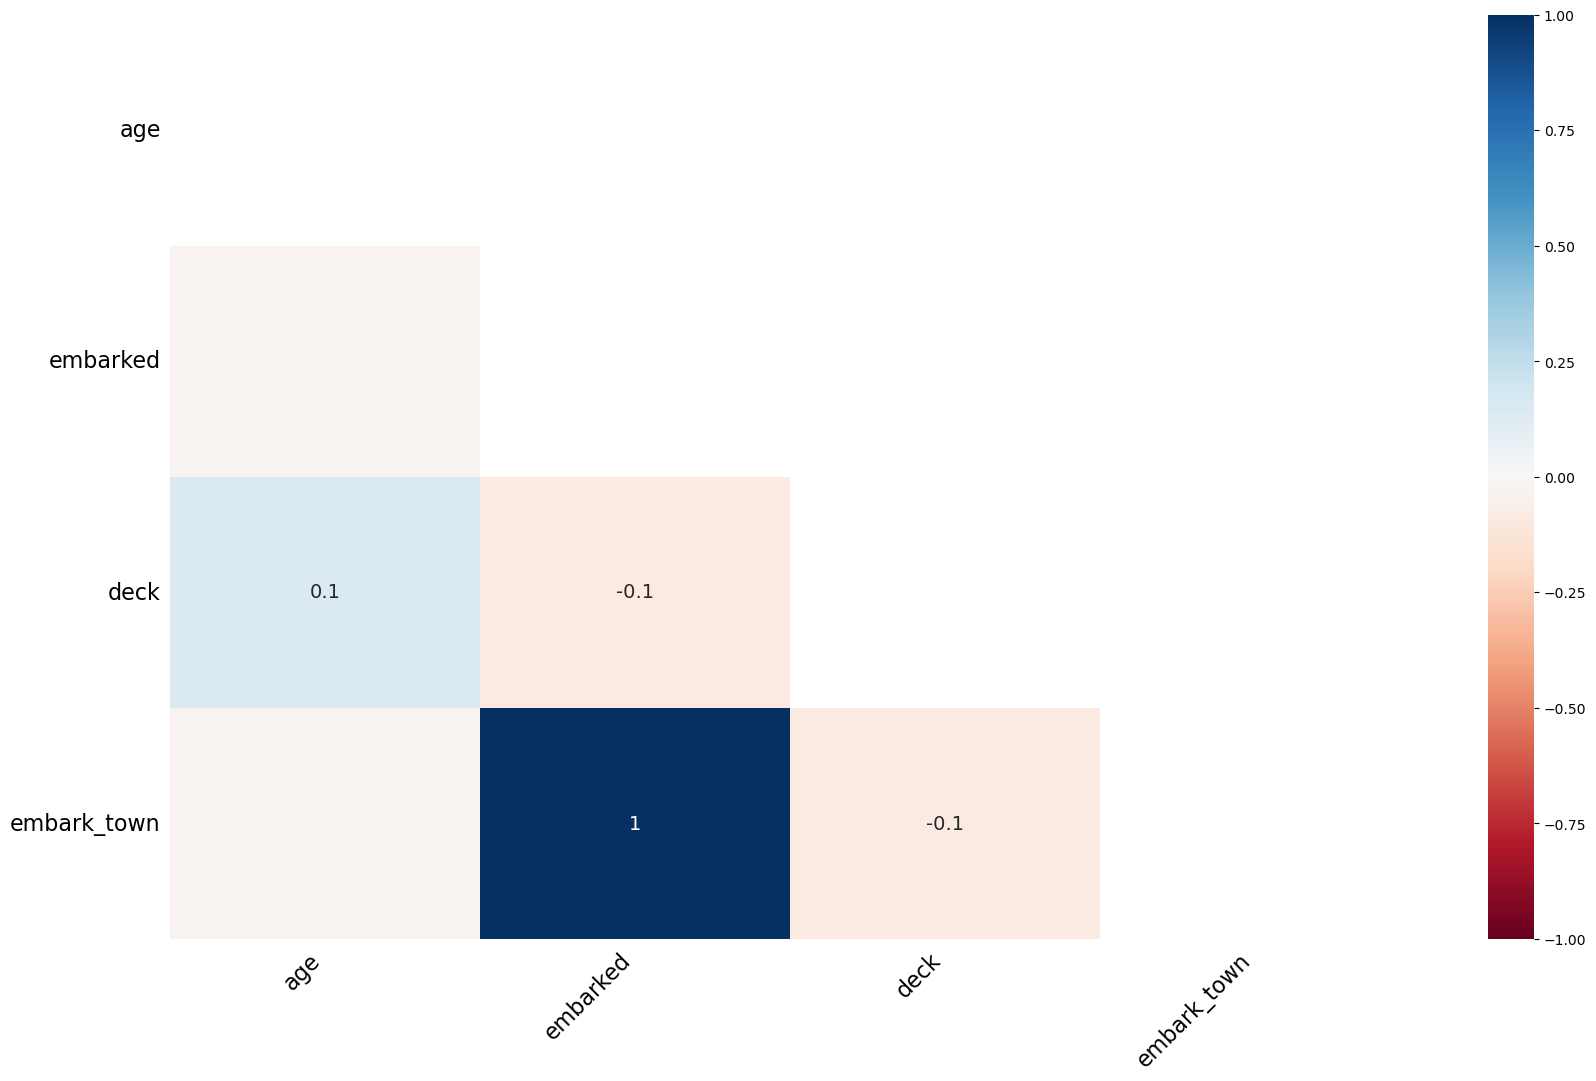

In [86]:
#히트맵
# 변수간 누락 데이터의 상관 관계를 시각화 하여, 어떤 변수들이 함께 누락 데이터를 갖는 경향이 있는지 확인

msno.heatmap(df)
plt.show()

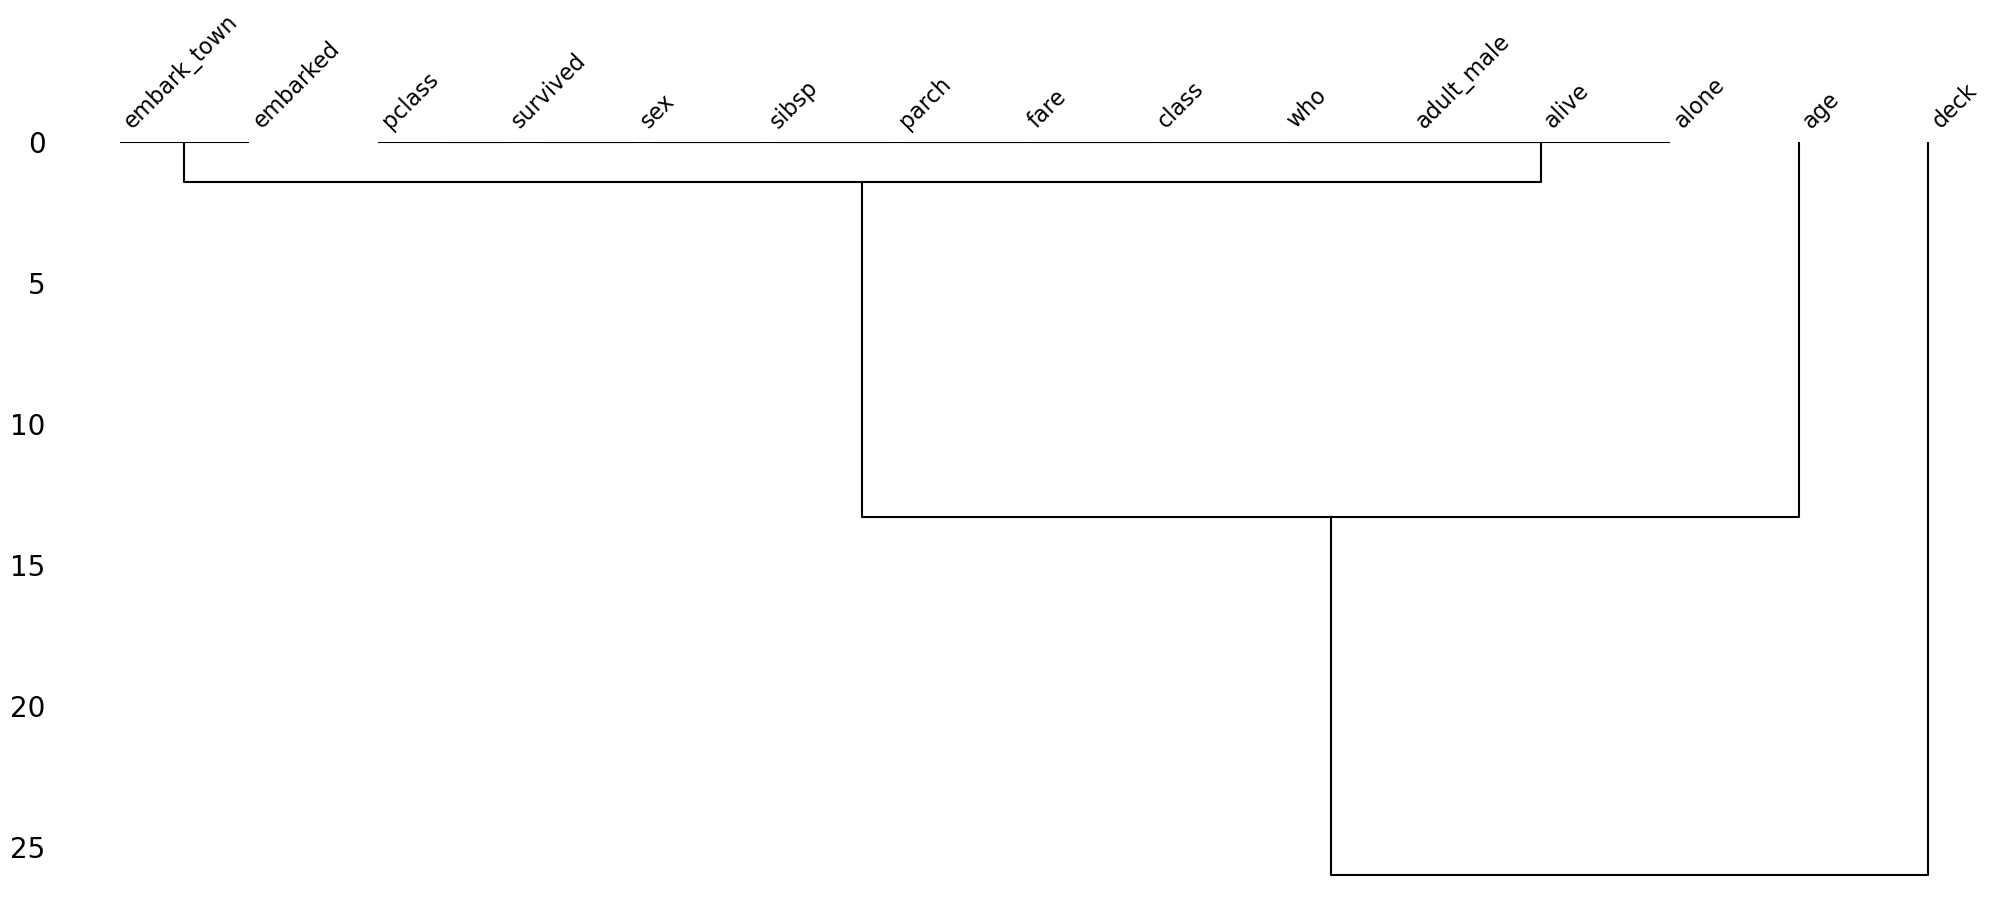

In [94]:
# 덴드로 그램
# 변수간 누락 데이터가 발생하는 패턴을 기반으로 계층적 클러스터링을 수행한 결과를 시각화 하여 보여줌 
# 누락 데이터가 유사한 변수들을 그룹화한다
# 세로축은 각 변수들 간의 차이를 수치화하여 보여준다
msno.dendrogram(df)
plt.show()

누락 데이터 제거

In [92]:
# 난 값이 있는 열을 제거, thresh 기준을 얘기하고 500, 난 이 500개있는 열을 dropna 해줄 거다, 삭제하고 저장하는건 아님 
# 하고 나면 deck 삭제됨

df.dropna(axis=1, thresh=500).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [44]:
# 난 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 난 값)

df_thresh = df.dropna(axis=1, thresh=500)
df_thresh.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
df.info() # df에는 'deck' 열이 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [54]:
df.dropna(subset=['age']).info() # axis이 생략되면 기본값으로 0으로 설정 axis=0이면 행을 삭제 # df에서 컬럼 age있는 NaN 값을 제거해보고 정보를 보여줘
#즉, 'age' 열에 값이 있는 행만 남깁니다. # 이건 그냥 본거 

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [97]:
# age 열에 나이 데이터가 없는 모든 행을 삭제
#how = any 난 값이 하나라도 있으면 모두 삭제 
# 이건 삭제하고 저장한거
df_age = df.dropna(subset=['age'], how='any', axis=0)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


누락 데이터 치환

In [64]:
# age 열의 첫 6개 데이터 출력 ( 5행에 난값)
df['age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: age, dtype: float64

In [101]:
# age 열의 NaN 값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean() # age 열의 평균 계산
df['age'].fillna(mean_age, inplace=True)
df['age'].head(6)
 # FILLNA 는 난 갑싱 있는 곳에 특정한 데이터를 넣어주는 것 

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\35830233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: age, dtype: float64

In [103]:
# nan자리에 평균값이 들어온것을 볼 수 있다

In [107]:
# embark_town 열은 범주형 데이터이기 때문에 평균이나 0으로 치환할 수 없다
# value_counts 를 이용해 가장 많이 등장한 도시로 NaN을 대체 하자.
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [164]:
df['embark_town'].value_counts(dropna=True)

embark_town
Southampton    645
Cherbourg      169
Queenstown      77
Name: count, dtype: int64

In [166]:
df['embark_town'].value_counts(dropna=True).idxmax() # dropna=True는 결측값(NaN)을 제외하고 계산
# .idxmax(): 계산된 빈도수 중에서 가장 큰 값의 인덱스(index)를 반환
# 이 코드는 'embark_town' 열에서 가장 많이 나타나는 값(최빈값)을 찾아서 반환합니다. 여기서 dropna=True를 사용하여 결측값(NaN)은 제외하고 계산

'Southampton'

In [214]:
# 엠바크 타운 열의 난 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
most_freq

'Southampton'

In [170]:
most_freq2 = df['embark_town'].mode()[0]
most_freq2

'Southampton'

In [172]:
# Southampton 644개로 가장 많다
df.pivot_table(index=['embark_town'], aggfunc='size')
# 피벗 테이블은 데이터를 요약하고 집계하는 데 매우 유용합니다.
# 특정 열(여기서는 'embark_town')을 기준으로 데이터를 요약하고, 각 그룹의 크기(개수)를 계산

embark_town
Cherbourg      169
Queenstown      77
Southampton    645
dtype: int64

In [174]:
df['embark_town'].fillna(most_freq,inplace=True)

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\718854397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(most_freq,inplace=True)


In [176]:
# 829의 NaN이 바뀜
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
Name: embark_town, dtype: object

In [178]:
# embark_town 열의 NaN 값을 바로 앞에 있는 828행의 값으로 변경하기
# 이런 함수는 시계열 데이터에서 많이 씀, 기온데이터 중간에 하나가 난 값이 존재하면 기온은 확 바뀌지 않으니까 심플하게 직전기온 
# 전날과 그 다음날의 평균값을 난 값에 채워주는 방법도 있는데 서울특별시 그것도 nan값을 앞에있는 데이터로 채울 수 있었따
#ffill : 앞에 있는 값
#bbill : 뒤에 있는 값
df['embark_town'].ffill(inplace=True)
df['embark_town'][825:831]

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\2532965638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].ffill(inplace=True)


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object

In [180]:
df = sns.load_dataset('titanic')
df['embark_town'][825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

In [182]:
df['embark_town'].bfill(inplace=True)
df['embark_town'][825:831]

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\2605130113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].bfill(inplace=True)


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object

# 2 중복 데이터처리

- 데이터 프레임에서 각 행은 분석 대상이 갖고 있는 모든 속성에 대한 관측값을 뜻함
- 하나의 데이터셋에 동일한 관측값 이 2개 이상 중복되는 경우 중복데이터를 삭제 해야함

In [191]:
import pandas as pd

df1= pd.DataFrame({'c1':['a','a','b','a','b'],
                   'c2':[1, 1, 1, 2, 2,],
                   'c3':[1, 1, 2, 2, 2]})
df1

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


중복 데이터 확인

In [198]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df1.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [200]:
df1['c2']

0    1
1    1
2    1
3    2
4    2
Name: c2, dtype: int64

In [202]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df1['c2'].duplicated()
col_dup

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [204]:
col_dup.sum()

3

In [206]:
df2 = df1.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [208]:
df3 = df1.drop_duplicates(subset=['c2','c3']) # 원본 데이터에서 일부 행이나 열을 선택하여 새로운 데이터 세트를 만드는 것을 의미
df3

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


# 3. 데이터 표준화
- 실무에서 접하는 데이터 셋은 다양한 사람들의 손을 거쳐서 만들어짐
- 동일한 대상을 표현하는 방법에 차이가 있으면, 분석의 정확도는 현저희 낮아지기 때문에 데이터 포맷을 일관성 있게 표준화하는 작업이 필요
- 측정 단위를 동일하게 맞출 필요가 있음

3-1 단위 환산
- 측정단위를 맞춰야함

In [230]:
# 한국은 키로당 아워, 리터를 쓰고 미국은 마일 퍼 갤런을 쓴다

import pandas as pd

# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/sample_data/auto-mpg.csv', header=None)

# 열 이름을 지정
df_auto.columns=['mpg','cylinder','displacement','horsepower','weight',
                 'accerleration', 'model year', 'origin','name']

display(df_auto.head())

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [232]:
# 1갤런이 몇 리터인지 봐야함

In [234]:
# 연비mpg(mile per gallin)를 연비kpl(kilometer per liter)로
# 변환 (mpg_to_kpl = 0.425) 
mpg_to_kpl = 1.60936 / 3.78541 # 1마일 -> 1.60936km, 1갤런 -> 3.78541리터
mpg_to_kpl

0.4251481345481731

In [236]:
df_auto['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [248]:
# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
df_auto['kpl']=df_auto['mpg'] * mpg_to_kpl

In [250]:
df_auto.head()

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652666
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377222
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652666
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802370
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227518


In [252]:
df_auto['kpl']=df_auto['kpl'].round(2)
df_auto.head()

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


3-2 자료형 변환

- 숫자가 문자열로 저장된 경우 숫자형으로 변환해야 함.
- dtypes 속성을 활용하여 데이터프레임을 구성하는 각 열의 자료형을 확인(info() 메소드로 확인 가능)

In [259]:
import pandas as pd

# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/sample_data/auto-mpg.csv', header=None)

# 열 이름을 지정
df_auto.columns=['mpg','cylinder','displacement','horsepower','weight',
                 'accerleration', 'model year', 'origin','name']
df_auto.head()

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [261]:
# 데이터의 자료형만 보고 싶어 dtypes

In [267]:
df_auto.dtypes # horsepower 기 object형이네

mpg              float64
cylinder           int64
displacement     float64
horsepower        object
weight           float64
accerleration    float64
model year         int64
origin             int64
name              object
dtype: object

In [269]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinder       398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    float64
 5   accerleration  398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin         398 non-null    int64  
 8   name           398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [271]:
df_auto.head(3)

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [277]:
df_auto['horsepower'].value_counts()[0:50]

horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
75.00    14
95.00    14
105.0    12
70.00    12
67.00    12
65.00    10
97.00     9
85.00     9
80.00     7
145.0     7
140.0     7
92.00     6
68.00     6
78.00     6
84.00     6
?         6
72.00     6
180.0     5
71.00     5
86.00     5
115.0     5
130.0     5
60.00     5
170.0     5
175.0     5
83.00     4
120.0     4
76.00     4
165.0     4
52.00     4
190.0     3
125.0     3
215.0     3
48.00     3
63.00     3
112.0     3
225.0     3
96.00     3
69.00     3
74.00     3
129.0     2
98.00     2
198.0     2
53.00     2
81.00     2
Name: count, dtype: int64

In [359]:
# 중간에 물음표를 찾음

In [361]:
df_auto['horsepower'].value_counts().index # 교재에 없는거

Index([150.0,  90.0,  88.0, 110.0, 100.0,  75.0,  95.0, 105.0,  70.0,  67.0,
        65.0,  97.0,  85.0, 145.0, 140.0,  80.0,  92.0,  68.0,  78.0,  84.0,
        72.0, 180.0,  60.0,  71.0,  86.0, 115.0, 130.0, 170.0, 175.0,  83.0,
       120.0,  76.0, 165.0,  52.0, 190.0, 125.0, 215.0,  48.0,  63.0, 112.0,
       225.0,  96.0,  69.0,  74.0, 129.0,  98.0, 198.0,  53.0,  81.0,  79.0,
       153.0,  58.0,  62.0,  87.0,  46.0, 160.0, 155.0, 139.0,  66.0, 149.0,
       132.0,  64.0, 116.0,  77.0,  89.0, 142.0, 135.0, 138.0, 133.0, 103.0,
       107.0, 108.0, 102.0, 220.0, 113.0, 200.0, 210.0, 193.0,  54.0, 208.0,
       137.0, 158.0, 167.0,  94.0, 230.0,  49.0,  91.0, 122.0,  61.0,  93.0,
       148.0, 152.0,  82.0],
      dtype='float64', name='horsepower')

In [363]:
# 이렇게 해도 되고 unique를 해도 된다

In [365]:
df_auto['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [367]:
# 누락 데이터('?') 데이터 삭제, dropna는 난 값만 삭제하는건데 
# ? 에다가 난을 넣어서 dropna를 사용해서 삭제

import numpy as np # 넘파이를 임포트 한 이유는 난이라는 자료형을 사용하기 위해서

df_auto['horsepower'].replace('?', np.nan, inplace=True)
df_auto['horsepower'].unique()

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\3182781859.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_auto['horsepower'].replace('?', np.nan, inplace=True)


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [369]:
df_auto.dropna(subset=['horsepower'], inplace=True) # 누락데이터 행을 삭제

In [371]:
df_auto['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [373]:
df_auto['horsepower'] = df_auto['horsepower'].astype('float') # 문자열을 실수형으로 변환
df_auto['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [375]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            392 non-null    float64 
 1   cylinder       392 non-null    int64   
 2   displacement   392 non-null    float64 
 3   horsepower     392 non-null    float64 
 4   weight         392 non-null    float64 
 5   accerleration  392 non-null    float64 
 6   model year     392 non-null    category
 7   origin         392 non-null    object  
 8   name           392 non-null    object  
 9   hp_bin         392 non-null    category
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 29.1+ KB


In [377]:
df_auto['origin'].unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [379]:
# 정수형 데이터를 문자형 데이터로 변환
# 1 인값을 usa로 2 를 eu로 3을 japan으로 변경
df_auto['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'},  inplace=True)
display( df_auto.head())
df_auto['origin'].replace({'USA' :1 , 'EU' :2 , 'JAPAN' :3 }, inplace=True)
display( df_auto.head())
df_auto['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'},  inplace=True)
display( df_auto.head())

C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\356425876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_auto['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'},  inplace=True)


,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,고출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,고출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,고출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,고출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,고출력


C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\356425876.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_auto['origin'].replace({'USA' :1 , 'EU' :2 , 'JAPAN' :3 }, inplace=True)


,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,고출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,고출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,고출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,고출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,고출력


,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,고출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,고출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,고출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,고출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,고출력


In [383]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            392 non-null    float64 
 1   cylinder       392 non-null    int64   
 2   displacement   392 non-null    float64 
 3   horsepower     392 non-null    float64 
 4   weight         392 non-null    float64 
 5   accerleration  392 non-null    float64 
 6   model year     392 non-null    category
 7   origin         392 non-null    object  
 8   name           392 non-null    object  
 9   hp_bin         392 non-null    category
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 29.1+ KB


In [385]:
# 유한 개의 고유값이 반복적으로 나타나는 경우에는 범주형 category 형이 이득임
df_auto['origin'] = df_auto['origin'].astype('category')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            392 non-null    float64 
 1   cylinder       392 non-null    int64   
 2   displacement   392 non-null    float64 
 3   horsepower     392 non-null    float64 
 4   weight         392 non-null    float64 
 5   accerleration  392 non-null    float64 
 6   model year     392 non-null    category
 7   origin         392 non-null    category
 8   name           392 non-null    object  
 9   hp_bin         392 non-null    category
dtypes: category(3), float64(5), int64(1), object(1)
memory usage: 26.6+ KB


In [317]:
# 제조국 열의 문자열 자료형을 srt 형으로 변환
df_auto['origin'] = df_auto['origin'].astype('str')
df_auto.info()

# 이거는 그냥 바꿔본건가?

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinder       392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    float64
 5   accerleration  392 non-null    float64
 6   model year     392 non-null    int64  
 7   origin         392 non-null    object 
 8   name           392 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 30.6+ KB


In [319]:
df_auto['model year'].sample(3) # 무직위로 샘플 3개를 뽑아주세요

118    73
62     72
138    74
Name: model year, dtype: int64

In [323]:
# 연도도 숫자형보다는 카테고리형으로 변환하는게 좋다
df_auto['model year'] = df_auto['model year'].astype('category')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            392 non-null    float64 
 1   cylinder       392 non-null    int64   
 2   displacement   392 non-null    float64 
 3   horsepower     392 non-null    float64 
 4   weight         392 non-null    float64 
 5   accerleration  392 non-null    float64 
 6   model year     392 non-null    category
 7   origin         392 non-null    object  
 8   name           392 non-null    object  
dtypes: category(1), float64(5), int64(1), object(2)
memory usage: 28.6+ KB


# 범주형 (카테고리) 데이터 처리

4-1 구간 분할
- 데이터 분석 알고리즘에 따라서는 연속 데이터를 그대로 사용하기 보다는 일정한 구간으로 나눠서 분석하는 것이 효율적인 경우가 있음
- 선택지가 적은게 예측하기 유리하다
- 구간 분할은 경계값을 기준으로 나누고 범주형 이산 변수로 변환하는 과정을 의미


In [339]:
# 구간 분할 # 경계1은 제일 작은 값 # 경계4는 제일 큰 값 
describe_dic = df_auto['horsepower'].describe()
describe_dic

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [341]:
describe_dic.loc['min']

46.0

In [345]:
bin_dividers = [describe_dic.loc['min'],describe_dic.loc['50%'],
                describe_dic.loc['75%'],describe_dic.loc['max']]
bin_dividers              

[46.0, 93.5, 126.0, 230.0]

In [347]:
# 3개의 bin에 이름 지정 여기는 값은 4개 지만 2개씩 묶어서 이름 배열하기 때문에 3개
bin_names =['저출력', '보통출력', '고출력']

In [351]:
# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df_auto['hp_bin'] = pd.cut(x=df_auto['horsepower'], # 데이터 배열
                               bins=bin_dividers, # 경계 값 리스트
                           labels=bin_names, # bin 이름
                           include_lowest=True) # 첫 경계값 포함
df_auto.head(30)

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,고출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,고출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,고출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,고출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,고출력
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500,고출력
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,chevrolet impala,고출력
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA,plymouth fury iii,고출력
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,pontiac catalina,고출력
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,amc ambassador dpl,고출력


# 4-2 더미 변수
- 범주형 데이터가 2개 이상일 경우 머신러닝 알고리즘에서는 범주형 데이터이기 보다 연속형 데이터로 연산되기 때문에 0,1 2개의 값 으로 변경해야함

In [389]:
# 원- 핫 인코딩
# 출력등급 열의 버주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df_auto['hp_bin'], dtype = int)
horsepower_dummies.head(30)

,저출력,보통출력,고출력
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [393]:
# 가장 먼저 나오는 값 하나를 제거해라
# 숫자값을 대응되서 바꿀 수 있다 남을 1 여를 0으로 한다는 가정, 원핫 인코딩을 하면 컬림을 남자, 여자가 되고 남자자리에 1 여자자리에 0
# 그래서 굳이 필요 없는 맨 앞에거를 지우는 것이다
horsepower_dummies = pd.get_dummies(df_auto['hp_bin'], drop_first = True, dtype = int)
horsepower_dummies.head(30)

,보통출력,고출력
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [397]:
# 원 - 핫 인코딩
# 토큰에 위치를 부여해서 입력값과 토큰값과 같으면 해당하는 위치에 지정해둔 값을 출력
# sklearn 라이브러리 불러오기
from sklearn import preprocessing
# 전처리를 위한 encoder 객체 생성
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [405]:
# label_encoder로 문자열 범주를 숫자형 범주로 변환
label_labeled = label_encoder.fit_transform(df_auto['hp_bin'].head(30)) # fit_transform 정수로 이루어진 1차원 배열을 반환
label_labeled
# 0은 고출력 1은 보통출력 2는 저출력

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 0, 2])

In [403]:
onehot_labeled = onehot_encoder.fit_transform(df_auto[['hp_bin']].head(30))
onehot_labeled

<30x3 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

# 5. 정규화 
- 각 변수에 들어 있는 숫자 데이터의 상대적 크기 차이 때문에 머신러닝 분석 결과가 달라질 수 있음
- 각 열에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것을 정규화라 함, 최소값과 최대값을 동일하게 맞춰줌

In [410]:
# 정규화 (스케일 조정)
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/sample_data/auto-mpg.csv', header=None)

# 열 이름을 지정
df_auto.columns=['mpg','cylinder','displacement','horsepower','weight',
                 'accerleration', 'model year', 'origin','name']
df_auto.head()

,mpg,cylinder,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [422]:
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환 # 전처리 과정이다 
df_auto['horsepower'].replace('?', np.nan, inplace=True)
df_auto.dropna(subset=['horsepower'], axis =0, inplace=True)
df_auto['horsepower'] = df_auto['horsepower'].astype('float')

In [424]:
df_auto['horsepower'].describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

In [426]:
# 출력 열의 최대값의 졀대값으로 모든 데이터를 나눠서 저장
min_x = df_auto['horsepower'] - df_auto['horsepower'].min()
min_x

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64

In [428]:
min_max = df_auto['horsepower'].max() - df_auto['horsepower'].min()
min_max

1.0

In [430]:
df_auto['horsepower'] = min_x / min_max # 표준화라고 한다 0~1 사이의 값
df_auto['horsepower']

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64

In [432]:
df_auto['horsepower'].describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

In [434]:
# 다시 실행

In [438]:
# 정규화 (스케일 조정)
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/sample_data/auto-mpg.csv', header=None)

# 열 이름을 지정
df_auto.columns=['mpg','cylinder','displacement','horsepower','weight',
                 'accerleration', 'model year', 'origin','name']
# horsepower 열의 누락 데이터 '?' 삭제하고 실수형으로 변환
df_auto['horsepower'].replace('?', np.nan, inplace=True)
df_auto.dropna(subset=['horsepower'], axis =0, inplace=True)
df_auto['horsepower'] = df_auto['horsepower'].astype('float')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinder       392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    float64
 5   accerleration  392 non-null    float64
 6   model year     392 non-null    int64  
 7   origin         392 non-null    int64  
 8   name           392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


C:\Users\705-8\AppData\Local\Temp\ipykernel_13188\4089534464.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_auto['horsepower'].replace('?', np.nan, inplace=True)


In [444]:
# horsepower 열을 Min-Max Scailing 적용 (사이킷런)

from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

df_auto['horsepower_MinMax'] = Scaler.fit_transform(df_auto[['horsepower']])
df_auto['horsepower_MinMax'].head()                                          

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_MinMax, dtype: float64

In [460]:
df_auto['horsepower_standard'] = (df_auto['horsepower'] - df_auto['horsepower'].mean()) / df_auto['horsepower'].std() 
df_auto['horsepower_standard'] 

0      0.663285
1      1.572585
2      1.182885
3      1.182885
4      0.923085
         ...   
393   -0.479835
394   -1.363154
395   -0.531795
396   -0.661694
397   -0.583754
Name: horsepower_standard, Length: 392, dtype: float64

In [462]:
del df_auto ['horsepower_horsepower']
df_auto .columns

Index(['mpg', 'cylinder', 'displacement', 'horsepower', 'weight',
       'accerleration', 'model year', 'origin', 'name', 'horsepower_MinMax'],
      dtype='object')

In [474]:
# horsepower 열을 standardscaler 적용 (사이킷런)

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

df_auto['horsepower_standard'] = Scaler.fit_transform(df_auto[['horsepower']])
df_auto['horsepower_standard'].head()                                          

0    0.664133
1    1.574594
2    1.184397
3    1.184397
4    0.924265
Name: horsepower_standard, dtype: float64

In [480]:
# 6 시계열 데이터 # 걍 넘어감

SyntaxError: invalid syntax (3124030776.py, line 1)